In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from matplotlib.colors import ListedColormap

In [29]:
df = pd.read_csv("./diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
normilized_values = scaler.fit_transform(df)

headers = df.columns
df = pd.DataFrame(normilized_values, columns=headers)

In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

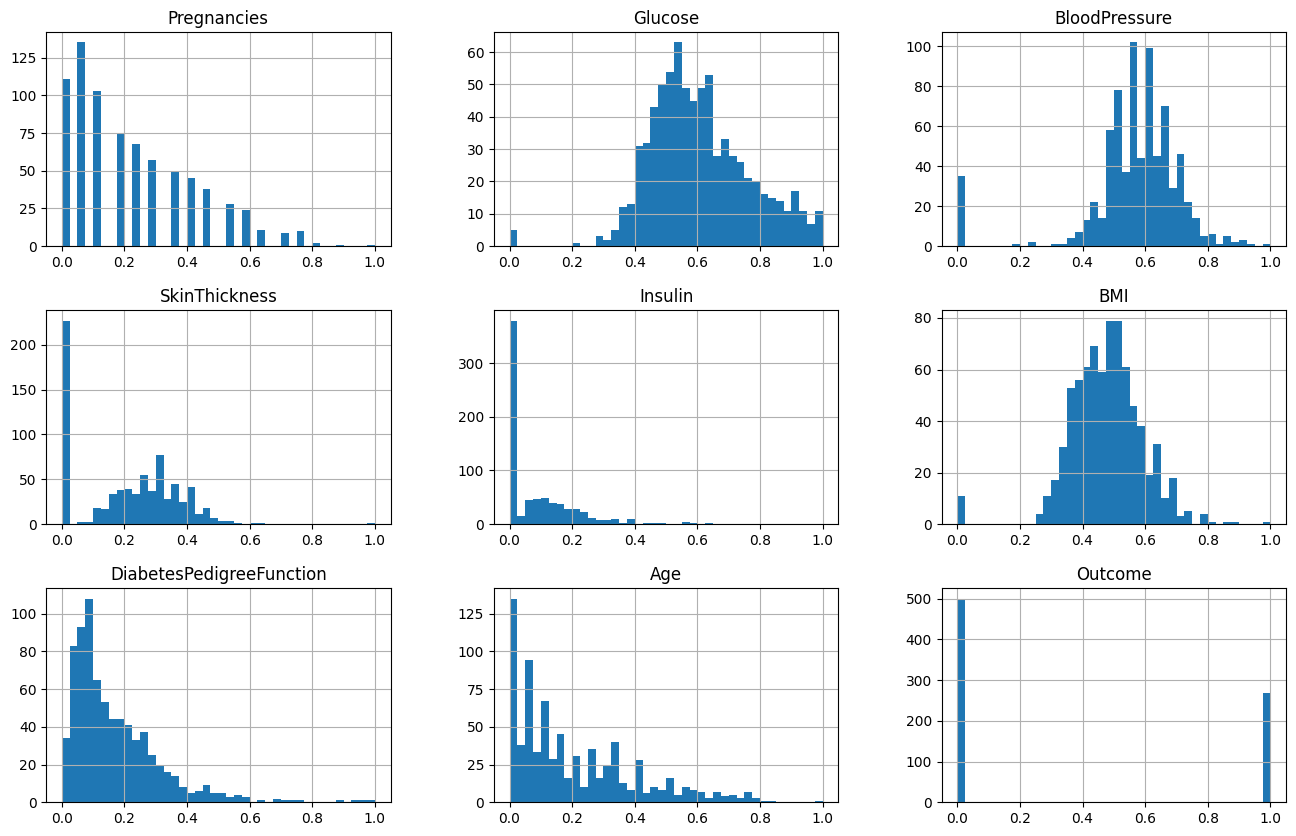

In [33]:
df.hist(figsize=(16, 10), bins=40)

Pregnancies                    Axes(0.125,0.11;0.0731132x0.77)
Glucose                     Axes(0.212736,0.11;0.0731132x0.77)
BloodPressure               Axes(0.300472,0.11;0.0731132x0.77)
SkinThickness               Axes(0.388208,0.11;0.0731132x0.77)
Insulin                     Axes(0.475943,0.11;0.0731132x0.77)
BMI                         Axes(0.563679,0.11;0.0731132x0.77)
DiabetesPedigreeFunction    Axes(0.651415,0.11;0.0731132x0.77)
Age                         Axes(0.739151,0.11;0.0731132x0.77)
Outcome                     Axes(0.826887,0.11;0.0731132x0.77)
dtype: object

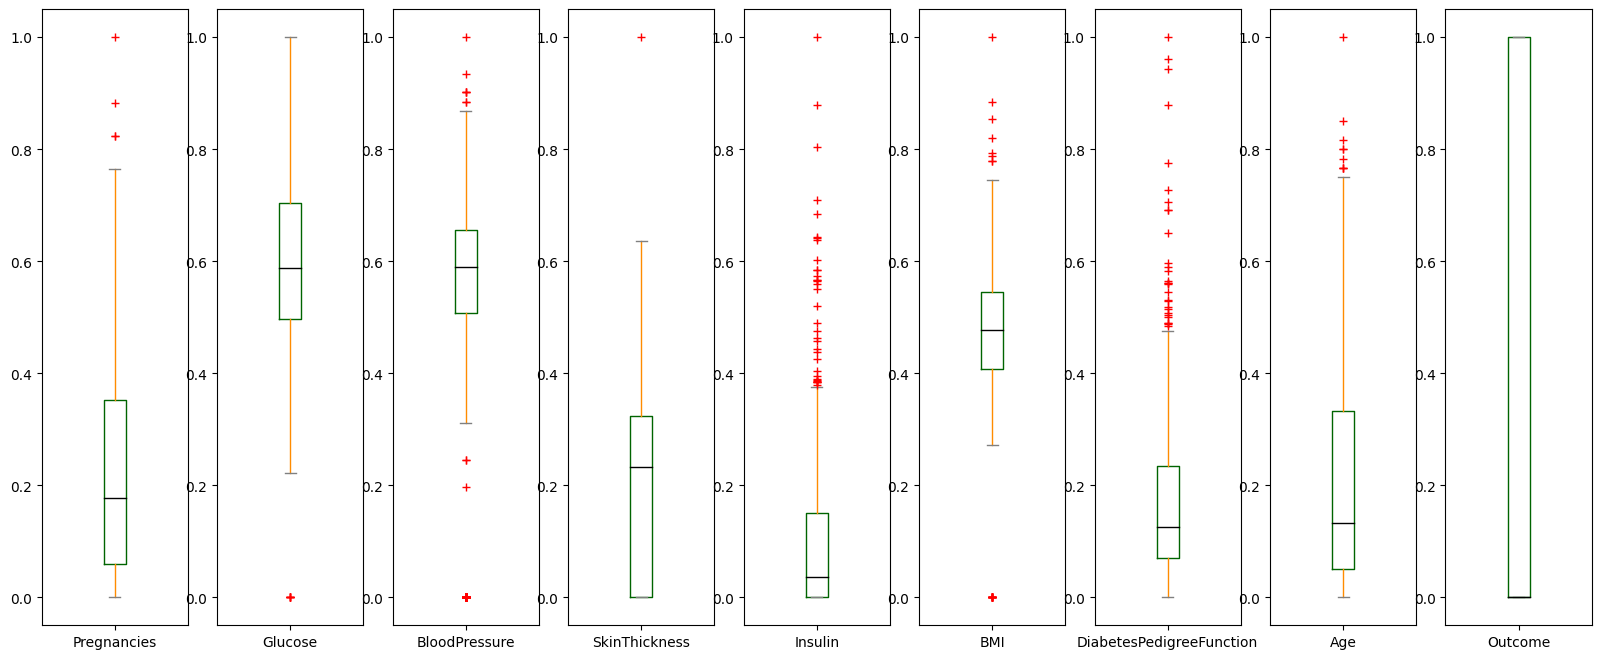

In [34]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "Black",
    "caps": "Gray",
}

df.plot.box(color=color, sym="r+", figsize=(20, 8), subplots=True)

<Axes: >

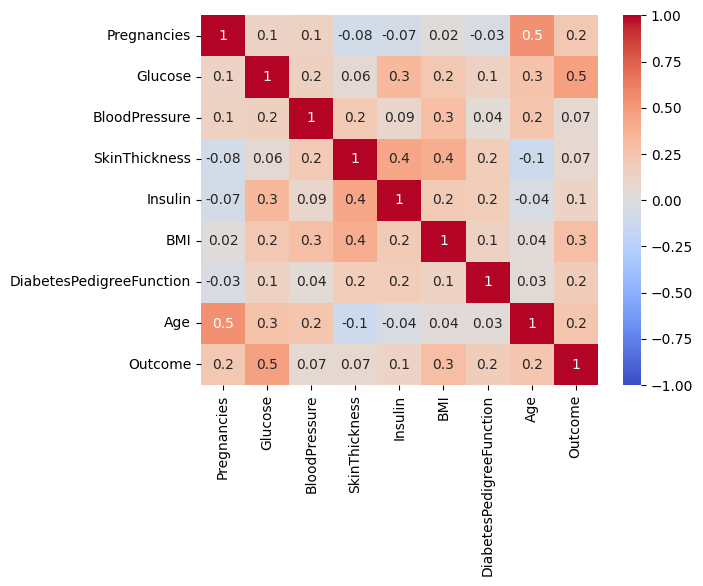

In [35]:
sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', )

In [36]:
def df_to_matrix(df, list_of_indexes: list):
    matrix = np.matrix(df[list_of_indexes])
    right_shape_matrix = np.array(matrix)
    return right_shape_matrix

In [37]:
default_train_size = 0.4
default_random_state = 335066

def split(df, params_X, param_y):
    X = df_to_matrix(df, params_X)
    y = np.array(df[param_y])
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        train_size=default_train_size, 
        random_state=default_random_state
    )
    return X_train, X_test, y_train, y_test, X, y

In [38]:
def accuracy(predictions, test):
    return np.sum(predictions == test) / len(test) 

In [39]:
def get_differents(X, y_test, y_predict):
    same_X = []
    same_y = []
    diff_X = []
    diff_y_test = []
    diff_y_predict = []
    for i in range(len(X)):
        if (y_test[i] != y_predict[i]):
            diff_X.append([X[i][0], X[i][1]])
            diff_y_test.append(y_test[i])
            diff_y_predict.append(y_predict[i])
        else:
            same_X.append([X[i][0], X[i][1]])
            same_y.append(y_test[i])
    return np.array(same_X), np.array(same_y), np.array(diff_X), np.array(diff_y_test), np.array(diff_y_predict)

In [40]:
cmap = ListedColormap(['#FF0000', '#0000FF'])
cmap_predict = ListedColormap(['#009988', '#AA00DD'])

def graph(X, y):
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap, s=20)
    plt.show()

def predictions_graph(X, y_test, y_predict):
    plt.figure()
    same_X, same_y, diff_X, diff_y_test, diff_y_predict = get_differents(X, y_test, y_predict)
    plt.scatter(same_X[:,0], same_X[:,1], c=same_y, cmap=cmap, s=20)
    plt.scatter(diff_X[:,0], diff_X[:,1], c=diff_y_predict, cmap=cmap_predict, s=20)
    plt.show()   

In [41]:
class Matrix():
    def __init__(self):
        self.TP = 0
        self.FP = 0
        self.TN = 0
        self.FN = 0
        
    def matrix_solver(self):
        self.print_graph()
        self.matrix_presicion()
        self.matrix_recall()
        self.matrix_f1_score()
        self.matrix_accuracy()
        return self.presicion, self.recall, self.f1_score, self.accuracy
    
    def fit(self, test, predictions):
        for i in range(len(test)):
            if (test[i] == 1 and predictions[i] == 1):
                self.TP += 1
            elif (test[i] == 1 and predictions[i] != 1):
                self.FN += 1
            elif (test[i] != 1 and predictions[i] == 1):
                self.FP += 1
            else:
                self.TN += 1 
    
    def matrix_presicion(self):
        self.presicion = self.TP / (self.TP + self.FP)
    
    def matrix_recall(self):
        self.recall = self.TP / (self.TP + self.FN)
        
    def matrix_f1_score(self):
        self.f1_score = 2 * self.presicion * self.recall / (self.presicion + self.recall)

    def matrix_accuracy(self):
        self.accuracy = (self.TP + self.TN) / (self.TP + self.TN + self.FP + self.FN)
        
    def print_graph(self):
        min_value = min(self.TN, self.FP, self.FN, self.TP)
        max_value = max(self.TN, self.FP, self.FN, self.TP)
        sns.heatmap([[self.TN, self.FP], [self.FN, self.TP]], annot = True, fmt='.2g', vmin=min_value, vmax=max_value, center=0, cmap= 'coolwarm')

In [42]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LogisticRegression():

    def __init__(self, learning_rate=0.001, iterations=100000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.y = y
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)

            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [43]:
def make_predictions(X_train, X_test, y_train, learning_rate_param, iterations_param):
    clf = LogisticRegression(learning_rate=learning_rate_param, iterations=iterations_param)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    return predictions

In [44]:
def make_matrix(test, predictions):
    matrix = Matrix()
    matrix.fit(test, predictions)
    presicion, recall, f1_score, accuracy = matrix.matrix_solver()
    return presicion, recall, f1_score, accuracy

In [45]:
def main(df, params_X, param_y):
    for learning_rate in [0.1, 0.01, 0.001, 0.0001]:
        print("learing rate =", learning_rate)
        for iterations in [1000, 10000, 100000]:
            print("iterations =", iterations)
            try:
                X_train, X_test, y_train, y_test, X, y = split(df, params_X, param_y)
                predictions = make_predictions(X_train, X_test, y_train, learning_rate, iterations)
                presicion, recall, f1_score, accuracy = make_matrix(y_test, predictions)
                predictions_graph(X_test, y_test, predictions)
                print("presicion =", presicion)
                print("recall =", recall)
                print("accuracy =", accuracy)
                print("f1 score =", f1_score)
                print()
                print()
            except ZeroDivisionError:
                print("Точность равна 0!!")
                print()
                print()
        print()
        print()
        print()
        print()

learing rate = 0.1
iterations = 1000


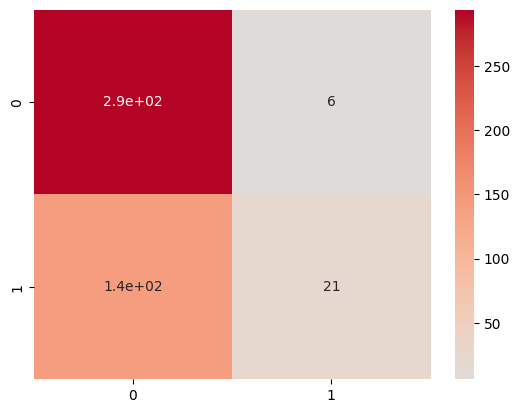

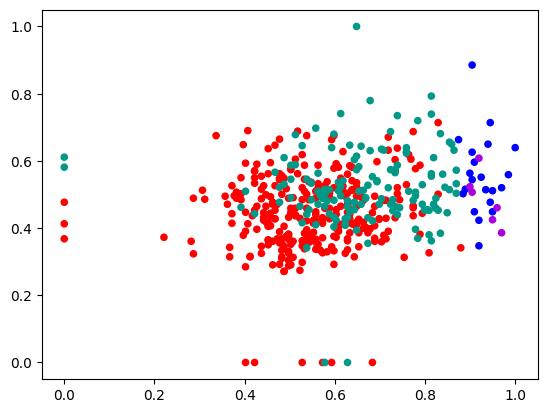

presicion = 0.7777777777777778
recall = 0.13043478260869565
accuracy = 0.6832971800433839
f1 score = 0.2234042553191489


iterations = 10000


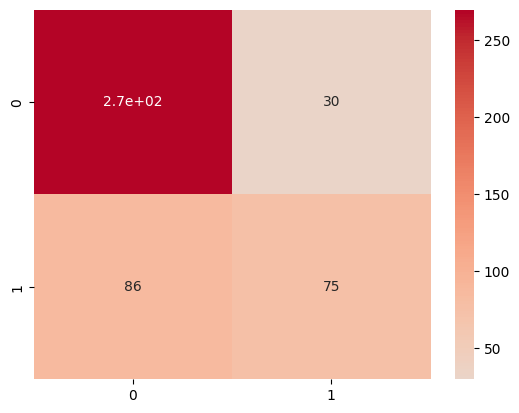

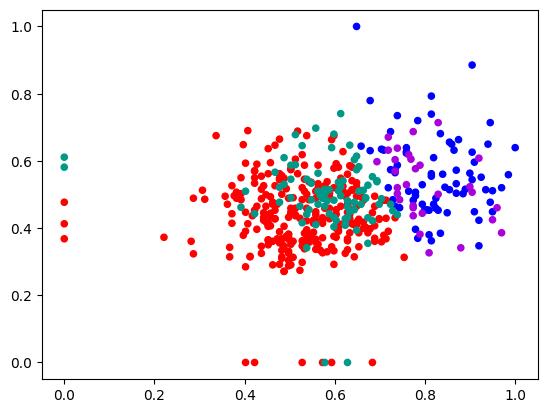

presicion = 0.7142857142857143
recall = 0.4658385093167702
accuracy = 0.7483731019522777
f1 score = 0.5639097744360902


iterations = 100000


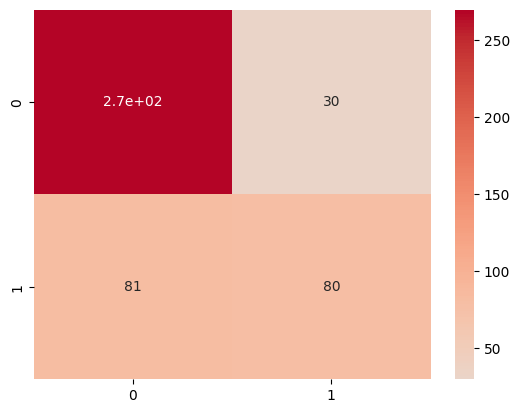

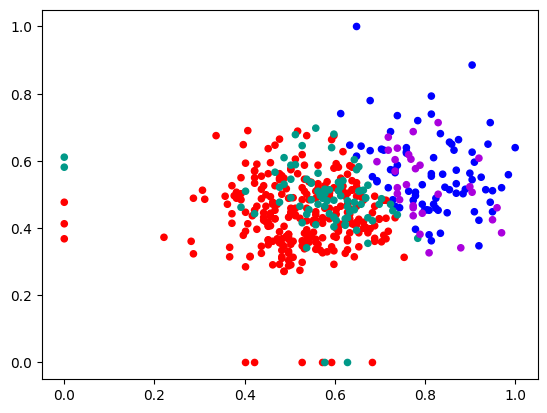

presicion = 0.7272727272727273
recall = 0.4968944099378882
accuracy = 0.7592190889370932
f1 score = 0.5904059040590406






learing rate = 0.01
iterations = 1000
Точность равна 0!!


iterations = 10000


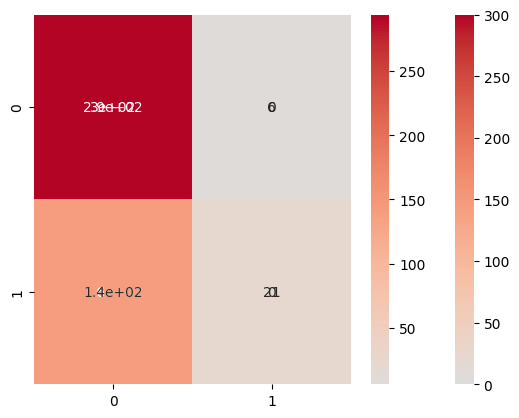

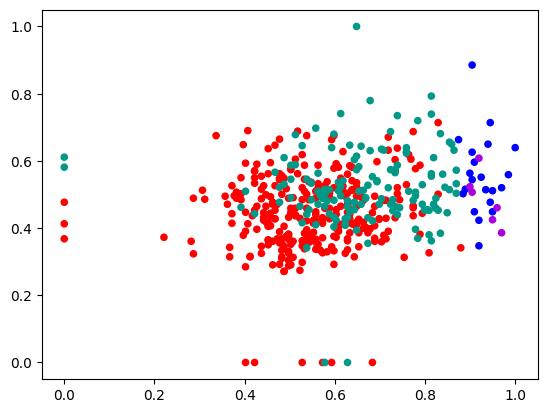

presicion = 0.7777777777777778
recall = 0.13043478260869565
accuracy = 0.6832971800433839
f1 score = 0.2234042553191489


iterations = 100000


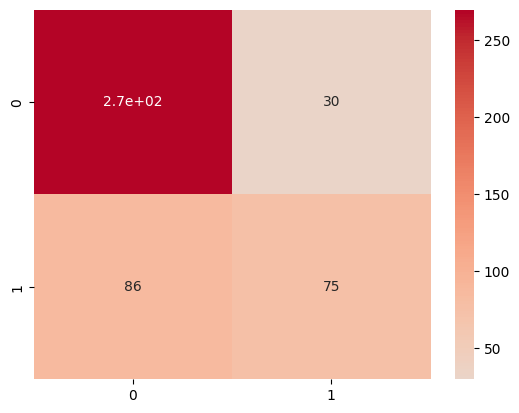

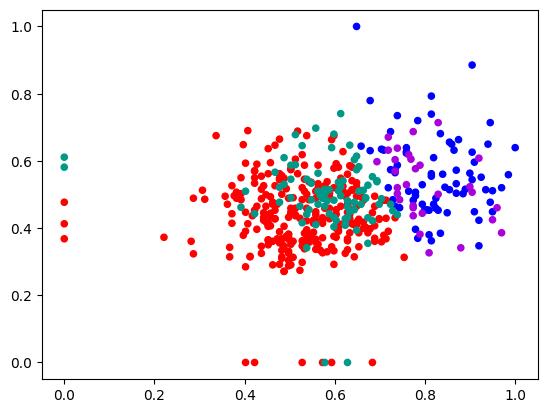

presicion = 0.7142857142857143
recall = 0.4658385093167702
accuracy = 0.7483731019522777
f1 score = 0.5639097744360902






learing rate = 0.001
iterations = 1000
Точность равна 0!!


iterations = 10000
Точность равна 0!!


iterations = 100000


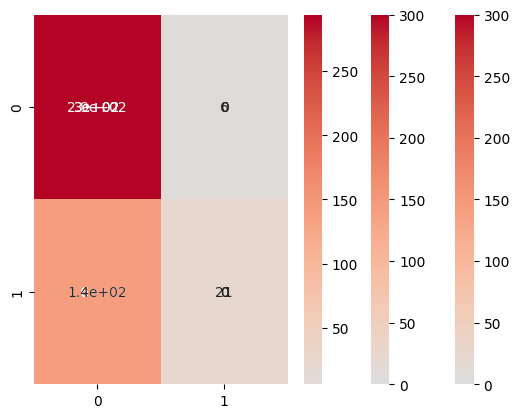

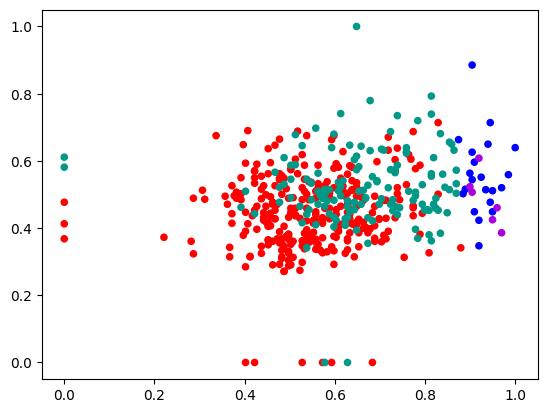

presicion = 0.7777777777777778
recall = 0.13043478260869565
accuracy = 0.6832971800433839
f1 score = 0.2234042553191489






learing rate = 0.0001
iterations = 1000
Точность равна 0!!


iterations = 10000
Точность равна 0!!


iterations = 100000
Точность равна 0!!








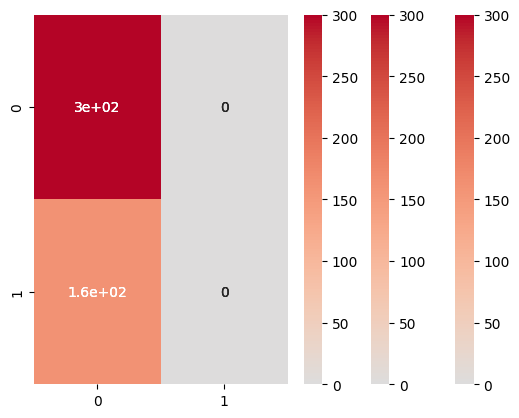

In [27]:
params_X = ["Glucose", "BMI"]
param_y = "Outcome"

main(df, params_X, param_y)